# Abalone Gender Prediction #
#### Objective: Predict the gender of abalone from physical measurements.
#### Data Retrieved From: 
https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

![molluskglass](https://user-images.githubusercontent.com/32555702/38159180-0effa6e8-3458-11e8-96e6-992118f3eb91.jpg)

### Table of Content:
1. Fetching Abalone Data
2. Data Preparation
            2.1 Remove Infant Observations
            2.2 Create Dummy Variables For Gender
3. Exploratory Data Analysis
            3.1 Pairplot of Abalone Data with Hue equal to sex
            3.2 Correlation Heatmap
            3.3 Plot rings by gender
            3.4 Violin Plot
            3.5 Others: Histogram/Bar Chart
4. Gender Prediction
            4.1 SVC
            4.2 Logistic Regression

## 1. Fetching Data

In [80]:
import numpy as np
import pandas as pd
abalone_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names =  ["Gender", "Length", "Diameter", "Height", 
          "Whole Weight", "Shucked Weight", "Viscera Weight", 
          "Shell Weight", "Rings"]
df = pd.read_csv(abalone_url, header=None, names = names)

In [23]:
df.head()

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 2. Data Preparation

Remove obserations where gender = "I" (infant) and only focus on categorization of Male/Female.

In [24]:
df_mf = df[df.Gender != 'I'].copy()

Create dummy variables for Gender

In [26]:
df_final=pd.get_dummies(df_mf, columns=["Gender"])
df_final.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Gender_F,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,0


## 3. EDA

In [27]:
import seaborn as sns
%matplotlib inline

### 3.1 Pairplot of Abalone Data with Hue equal to sex (M, F, I)

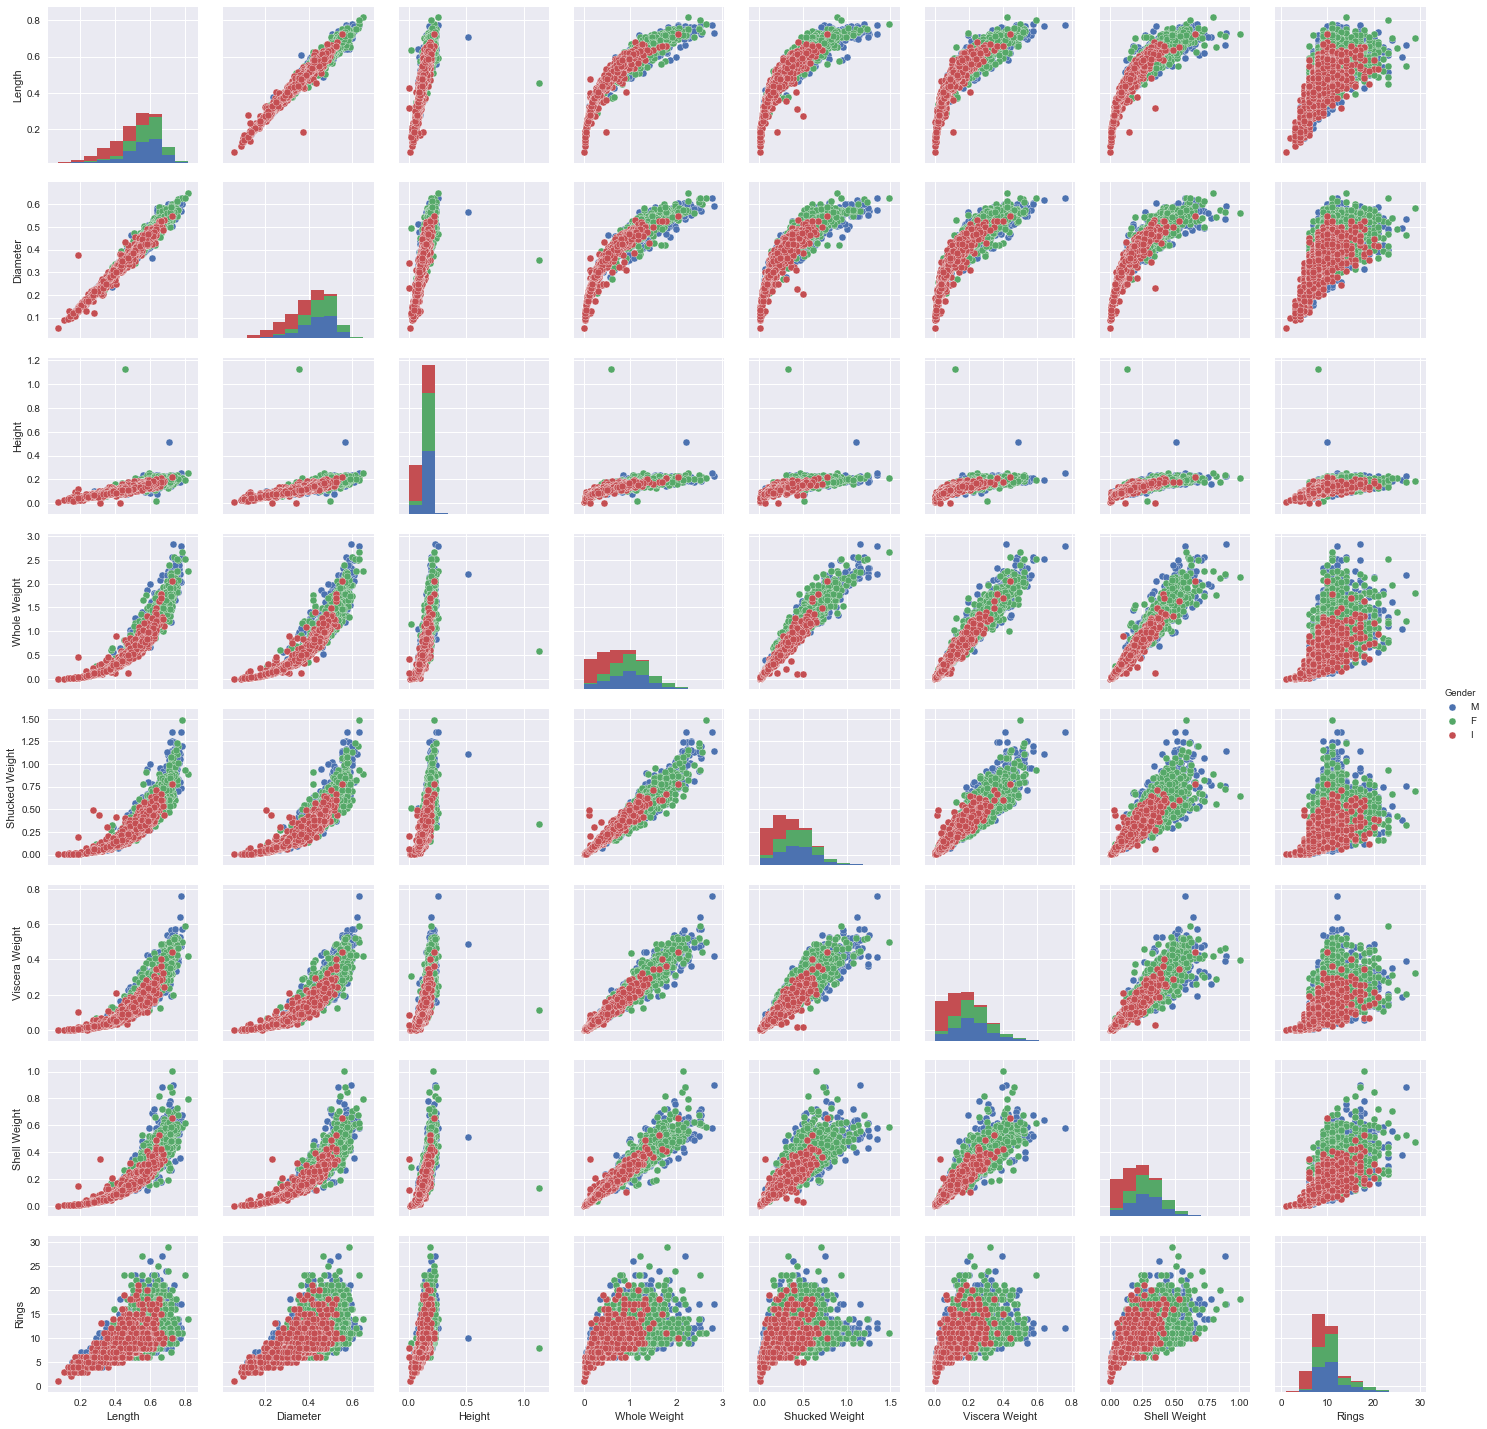

In [30]:
sns.pairplot(data=df, hue="Gender")

### 3.2 Correlation Heatmap

In [49]:
corr = df_mf.corr()

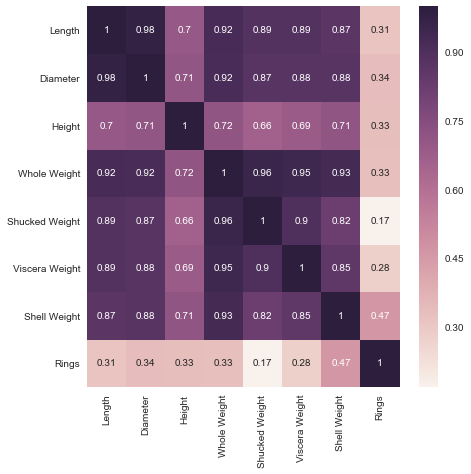

In [50]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(7,7))
sns.heatmap(corr, annot=True)

### 3.3 Plot Rings By Gender

In [48]:
from ggplot import *
ggplot(df_mf,aes(x="Rings", color = "Gender")) + geom_density(position = "stack")

ImportError: No module named ggplot

### 3.4 Violin Plot
(1) Distribution of Diameter by Rings

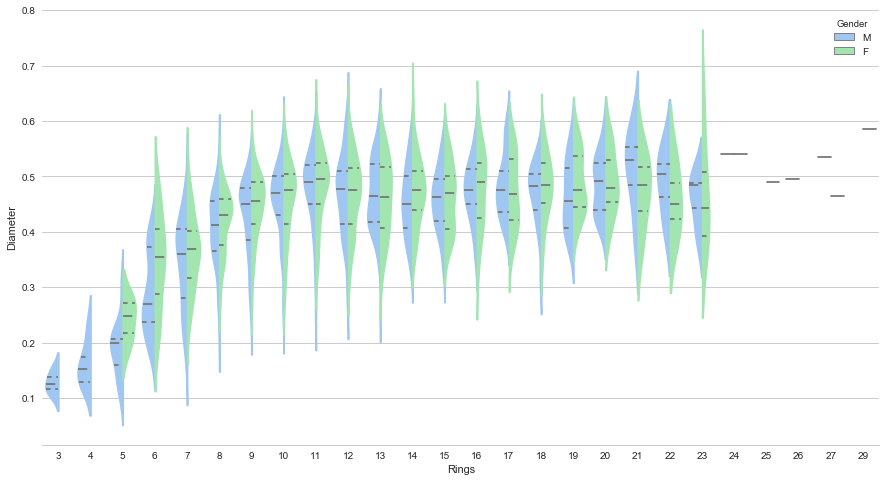

In [54]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

plt.figure(figsize=(15,8))
sns.violinplot(x="Rings", y="Diameter", hue="Gender", data=df_mf, split=True,
               inner="quart")
sns.despine(left=True)

(2) Distribution of Length By Gender

In [ ]:
sns.violinplot(x=df['Gender'], y=df['Diameter'])

### 3.5 Others
(1) Histogram: Distribution of Shucked Weight

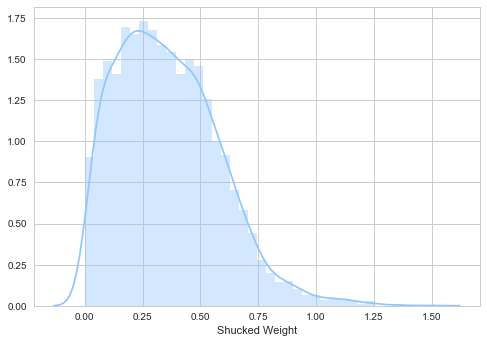

In [57]:
sns.distplot(df['Shucked Weight'])

(2) Bar Chat: Whole Weight by Gender

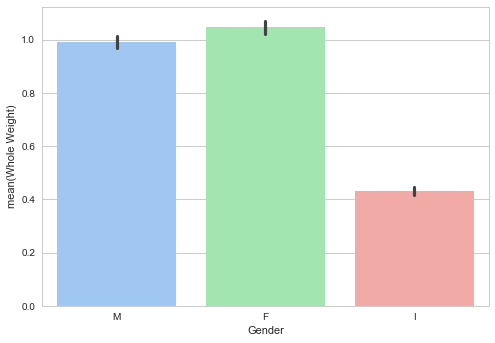

In [55]:
sns.barplot(x=df['Gender'], y=df['Whole Weight'])

## 4. Abalone Gender Prediction

In [62]:
x = df_mf.drop("Gender", axis=1)
y = df_mf["Gender"]
x.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


### Split Training & Test Dataset

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)

### 4.1 SVC Classification

In [83]:
from sklearn.svm import SVC

svc = SVC(gamma=0.0001)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
svc.score(X_test, y_test)

0.53205128205128205

## 4.2 Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel1 = LogisticRegression()
logmodel1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
predictions = logmodel1.predict(X_test)

In [74]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          F       0.53      0.18      0.26       438
          M       0.54      0.87      0.67       498

avg / total       0.54      0.54      0.48       936



In [75]:
print(confusion_matrix(y_test, predictions))

[[ 77 361]
 [ 67 431]]


Reference:

classification:
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://angusmacnab.com/Abalone_SKLearn_Tut_0.4.html 

ggplot:
https://rpubs.com/justmarkham/abalone-ggplot2